# 목차

1. 부산 기온 데이터 수집

2. 부산에서 가장 더웠던 날은? 검색

3. 매년 크리스마스의 최고 기온과 최저 기온 추이 : plot

4. 월별 기온 데이터 : boxplot

## 1. 부산 기온 데이터 수집

In [2]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/busan_utf8.csv', header=7) # 불러들일 row 위치 지정
df.head()

# 데이터 전처리 (컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온', 
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)
                   
# 결측 데이터 삭제
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43264 entries, 0 to 43263
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      43264 non-null  object 
 1   지점      43264 non-null  int64  
 2   평균기온    43264 non-null  float64
 3   최저기온    43264 non-null  float64
 4   최고기온    43264 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
df.describe() 

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,43264.0,43264.000000,43254.000000,43260.000000
mean,159.0,14.168050,10.819318,18.437196
std,0.0,8.325085,8.856634,8.106433
min,159.0,-11.300000,-14.000000,-8.200000
25%,159.0,7.500000,3.600000,12.000000
50%,159.0,15.100000,11.600000,19.500000
75%,159.0,20.900000,18.200000,24.900000
max,159.0,31.700000,28.300000,37.300000


##  2. 부산에서 가장 더웠던 날은? 검색

In [3]:
df['날짜'] = df['날짜'].astype('datetime64')

In [4]:
df['년']= df['날짜'].dt.year
df['월']= df['날짜'].dt.month
df['일']= df['날짜'].dt.day

In [5]:
# 최고기온을 기준으로 정렬
df.sort_values(by='최고기온', ascending=False)

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
41035,2016-08-14,159,31.7,28.3,37.3,2016,8,14
28971,1983-08-04,159,30.8,26.5,36.7,1983,8,4
41036,2016-08-15,159,29.4,25.3,36.6,2016,8,15
41756,2018-08-05,159,31.3,28.1,36.4,2018,8,5
41392,2017-08-06,159,31.7,27.6,36.2,2017,8,6
...,...,...,...,...,...,...,...,...
26560,1976-12-27,159,-8.4,-11.5,-5.3,1976,12,27
28082,1981-02-26,159,-7.9,-10.4,-5.7,1981,2,26
3932,1915-01-14,159,-8.9,-12.7,-5.8,1915,1,14
10519,1933-01-26,159,-8.5,-9.7,-6.2,1933,1,26


In [6]:
# 부산에서 가장 더웠던 날은? 
df_temp = df.sort_values(by=['최고기온'], ascending=False)
df_temp.head(1)

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
41035,2016-08-14,159,31.7,28.3,37.3,2016,8,14


In [7]:
# 부산에서 가장 더웠던 날 (출력)

max_date=df.loc[41035,'날짜']
max_temp=df.loc[41035,'최고기온']

print(f'부산에서 가장 더웠던 날은 {max_date} 의 {max_temp}도 입니다')

부산에서 가장 더웠던 날은 2016-08-14 00:00:00 의 37.3도 입니다


In [8]:
max_date


Timestamp('2016-08-14 00:00:00')

In [11]:
str(max_date).split()[0]

'2016-08-14'

In [12]:
str(max_date).split()[1]

'00:00:00'

In [13]:
a=str(max_date).split()[0]
a.split('-')[0]

'2016'

In [73]:
max_year=df.loc[41035,'년']
max_year

2016

In [74]:
max_year=df.loc[41035,'년']
max_month=df.loc[41035,'월']
max_day=df.loc[41035,'일']
max_temp=df.loc[41035,'최고기온']

print(f'부산에서 가장 더웠던 날은 {max_year}년 {max_month}월 {max_day}일의 {max_temp}도 입니다')

부산에서 가장 더웠던 날은 2016년 8월 14일의 37.3도 입니다


# 3. 매년 크리스마스의 최고 기온과 최저 기온 추이 : plot

In [17]:
# 크리스마스(12-25)의 최고 최저 데이터만 추출
christmas_df = df[(df['월'] == 12) & (df['일'] ==25)]
# 필요한 컬럼만 추출
christmas_df = christmas_df[['년', '최고기온', '최저기온']]
christmas_df.head()

,년,최고기온,최저기온
260,1904,7.7,-1.5
625,1905,14.8,10.5
990,1906,3.8,-4.8
1355,1907,13.9,5.3
1721,1908,9.1,-0.6


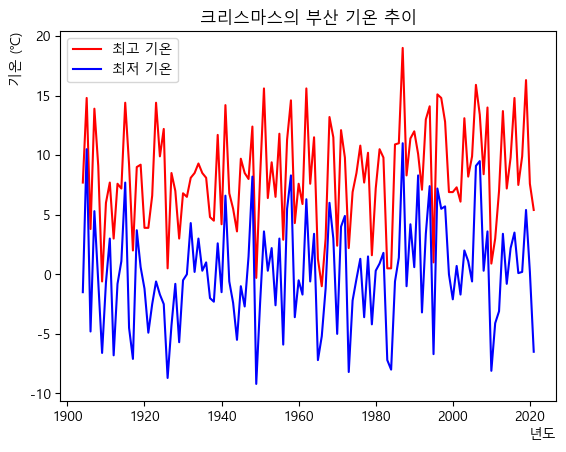

In [54]:
# 크리스마스 데이터 그래프 그리기
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  
plt.title('크리스마스의 부산 기온 추이')
plt.plot(christmas_df['년'],christmas_df['최고기온'], color='r', label='최고 기온' )
plt.plot(christmas_df['년'],christmas_df['최저기온'], color='b', label='최저 기온' )
plt.xlabel('년도', loc='right')
plt.ylabel('기온 (℃)', loc='top')
plt.legend()

# 4. 월별 기온 데이터 : boxplot

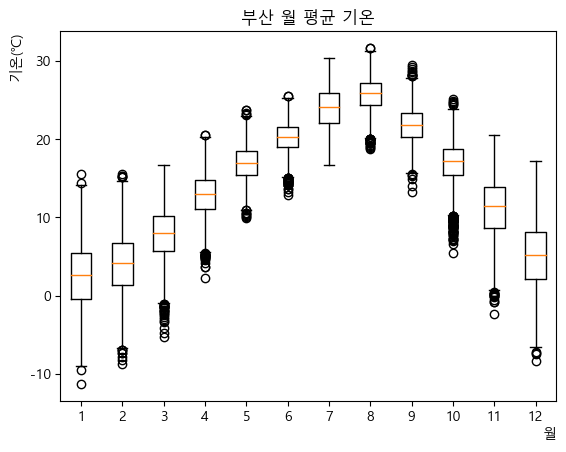

In [55]:
#부산 월별 평균 기온 데이터 

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

plt.title('부산 월 평균 기온')
plt.xlabel('월', loc='right')
plt.ylabel('기온(℃)', loc='top')

month_avg_temp=[]
labelling=[]

for n in range(1,13):
    month_avg_temp.append(df[df['월']==n]['평균기온'])
    labelling.append(n)
plt.boxplot(month_avg_temp,labels=labelling)
plt.show()

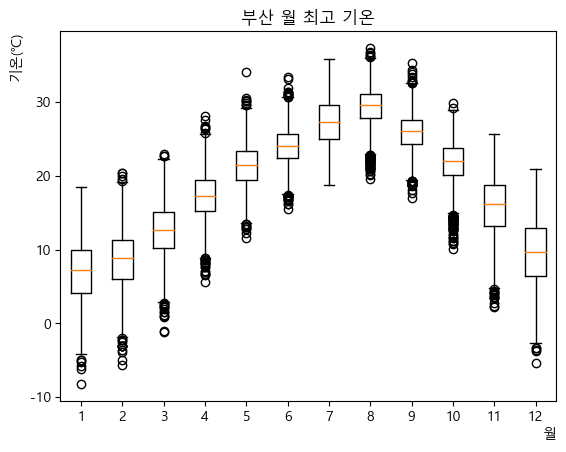

In [56]:
#부산 월별 최고 기온 데이터 

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

plt.title('부산 월 최고 기온')
plt.xlabel('월', loc='right')
plt.ylabel('기온(℃)', loc='top')

month_max_temp=[]
labelling=[]

for n in range(1,13):
    month_max_temp.append(df[df['월']==n]['최고기온'])
    labelling.append(n)
plt.boxplot(month_max_temp,labels=labelling)
plt.show()

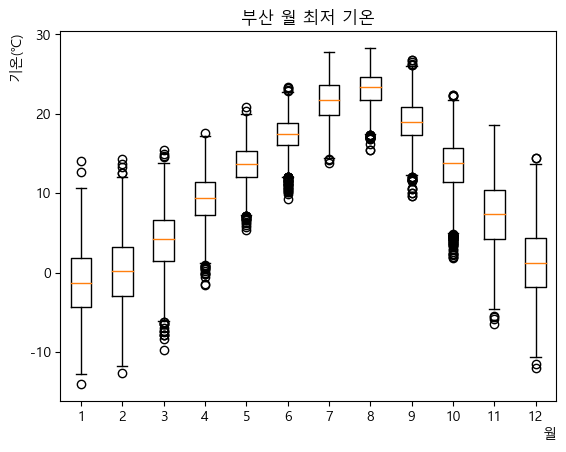

In [57]:
#부산 월별 최저 기온 데이터 

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

plt.title('부산 월 최저 기온')
plt.xlabel('월', loc='right')
plt.ylabel('기온(℃)', loc='top')

month_min_temp=[]
labelling=[]

for n in range(1,13):
    month_min_temp.append(df[df['월']==n]['최저기온'])
    labelling.append(n)
plt.boxplot(month_min_temp,labels=labelling)
plt.show()


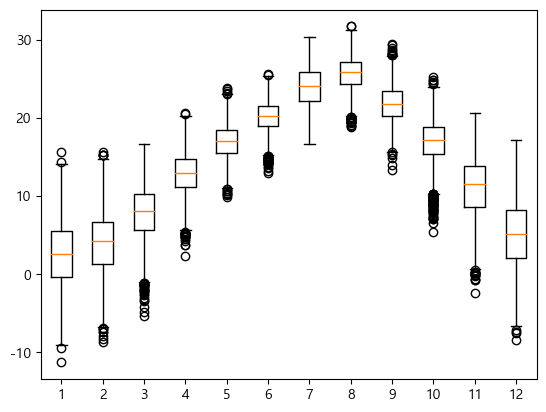

In [53]:
# 전체 방식 시도
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

avg_month = []
max_month = []
min_month = []

for i in range(1, 13):
    avg_month.append(df.loc[df['월']==i, '평균기온'])
    max_month.append(df.loc[df['월']==i, '최고기온'])
    min_month.append(df.loc[df['월']==i, '최저기온'])

plt.boxplot(avg_month)
plt.show()
